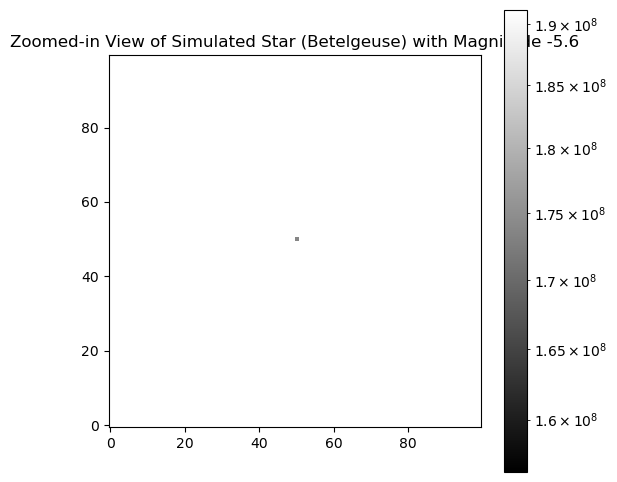

In [17]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Function to simulate a point star in a FITS file
def simulate_star_fits(magnitude, filename='star_simulation.fits'):
    # Define the size of the image
    size = 1000
    # Create an empty image array
    image_data = np.zeros((size, size))

    # Calculate the center of the image
    center = size // 2

    # Normalize the magnitude to use it for point brightness
    # Arbitrary scaling for the simulation
    brightness = 10 ** ((-magnitude + 5) / 2.5) * 1e4  # Adjust the factor for visibility

    # Place the star at the center of the image
    image_data[center, center] = brightness

    # Create a FITS PrimaryHDU object
    hdu = fits.PrimaryHDU(image_data)

    # Write the FITS file
    hdu.writeto(filename, overwrite=True)
    return filename

# Simulate Betelgeuse with an apparent magnitude of -5.6
filename = simulate_star_fits(-5.6)

# Load the FITS file to display
hdu_list = fits.open(filename)
image_data = hdu_list[0].data

# Define zoom region (around the center of the image)
zoom_size = 100  # Size of the zoom region
center = image_data.shape[0] // 2
zoom_region = image_data[center - zoom_size // 2:center + zoom_size // 2, center - zoom_size // 2:center + zoom_size // 2]

# Display the zoomed-in image data
plt.figure(figsize=(6, 6))
plt.imshow(zoom_region, cmap='gray', origin='lower', norm=LogNorm())
plt.colorbar()
plt.title('Zoomed-in View of Simulated Star (Betelgeuse) with Magnitude -5.6')
plt.show()


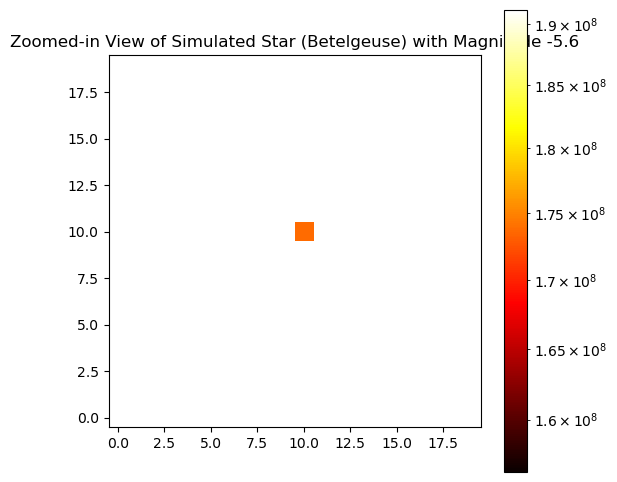

In [19]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Function to simulate a point star in a FITS file and display a zoomed-in region
def simulate_star_fits(magnitude, zoom_size=50, filename='star_simulation.fits'):
    # Define the size of the image
    size = 1000
    # Create an empty image array
    image_data = np.zeros((size, size))

    # Calculate the center of the image
    center = size // 2

    # Normalize the magnitude to use it for point brightness
    # Arbitrary scaling for the simulation
    brightness = 10 ** ((-magnitude + 5) / 2.5) * 1e4  # Adjust the factor for visibility

    # Place the star at the center of the image
    image_data[center, center] = brightness

    # Create a FITS PrimaryHDU object
    hdu = fits.PrimaryHDU(image_data)

    # Write the FITS file
    hdu.writeto(filename, overwrite=True)
    
    # Load the FITS file to display
    hdu_list = fits.open(filename)
    image_data = hdu_list[0].data

    # Define zoom region (around the center of the image)
    zoom_region = image_data[center - zoom_size // 2:center + zoom_size // 2, center - zoom_size // 2:center + zoom_size // 2]

    # Display the zoomed-in image data
    plt.figure(figsize=(6, 6))
    plt.imshow(zoom_region, cmap='hot', origin='lower', norm=LogNorm())
    plt.colorbar()
    plt.title(f'Zoomed-in View of Simulated Star (Betelgeuse) with Magnitude {magnitude}')
    plt.show()

# Simulate Betelgeuse with an apparent magnitude of -5.6 and a zoom region of 20
simulate_star_fits(-5.6, zoom_size=20)


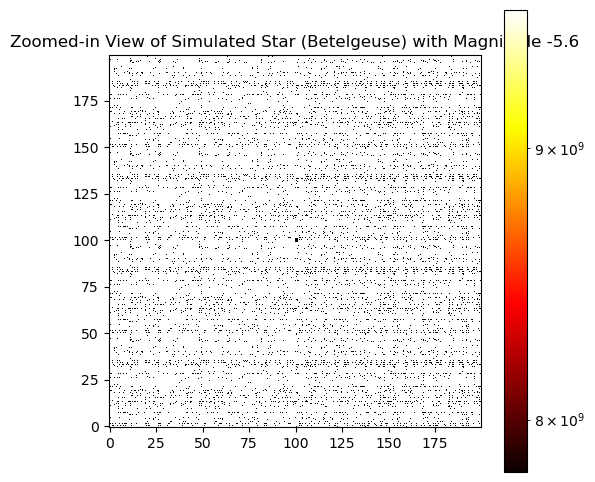

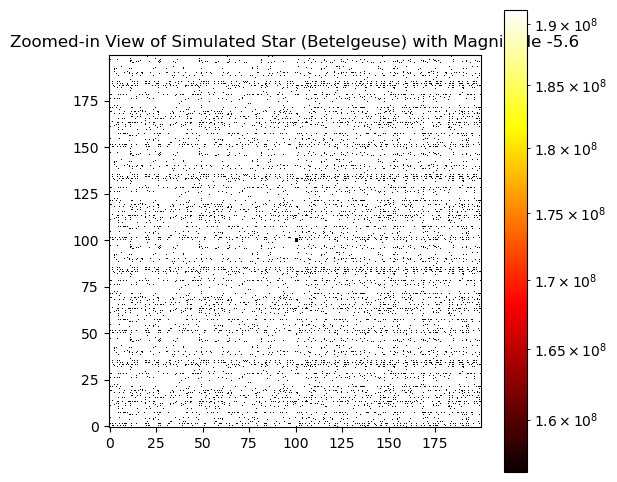

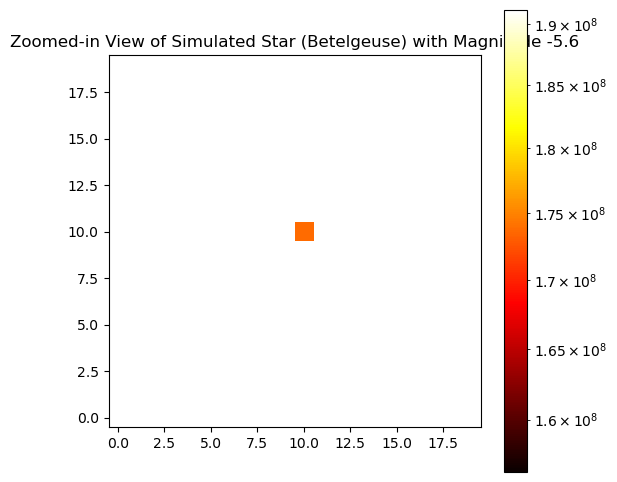

In [54]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Function to simulate a point star in a FITS file and display a zoomed-in region
def simulate_star_fits(magnitude, zoom_size=50, filename='gridsim.fits'):
    # Define the size of the image
    size = 1000
    # Create an empty image array
    image_data = np.zeros((size, size))

    # Calculate the center of the image
    center = size // 2

    # Normalize the magnitude to use it for point brightness
    # Arbitrary scaling for the simulation
    brightness = 10 ** ((-magnitude + 5) / 2.5) * 1e4  # Adjust the factor for visibility

    # Place the star at the center of the image
    image_data[center, center] = brightness
    image_data[100, 400] = brightness*50
    image_data[800, 900] = brightness
    # Create a FITS PrimaryHDU object
    hdu = fits.PrimaryHDU(image_data)

    # Write the FITS file
    hdu.writeto(filename, overwrite=True)
    
    # Load the FITS file to display
    hdu_list = fits.open(filename)
    image_data = hdu_list[0].data

    # Define zoom region (around the center of the image)
    zoom_region = image_data[center - zoom_size // 2:center + zoom_size // 2, center - zoom_size // 2:center + zoom_size // 2]
    # clip to see star at 100, 400 and 800, 900
    clip_region = image_data[0:200, 300:500]

    plt.figure(figsize=(6, 6))
    plt.imshow(clip_region, cmap='hot', origin='lower', norm=LogNorm())
    plt.colorbar()
    plt.title(f'Zoomed-in View of Simulated Star (Betelgeuse) with Magnitude {magnitude}')
    plt.show()

    clip_2 = image_data[700:900, 800:1000]

    plt.figure(figsize=(6, 6))
    plt.imshow(clip_2, cmap='hot', origin='lower', norm=LogNorm())
    plt.colorbar()
    plt.title(f'Zoomed-in View of Simulated Star (Betelgeuse) with Magnitude {magnitude}')

    plt.show()


    # Display the zoomed-in image data
    plt.figure(figsize=(6, 6))
    plt.imshow(zoom_region, cmap='hot', origin='lower', norm=LogNorm())
    plt.colorbar()
    plt.title(f'Zoomed-in View of Simulated Star (Betelgeuse) with Magnitude {magnitude}')
    plt.show()

# Simulate Betelgeuse with an apparent magnitude of -5.6 and a zoom region of 20
simulate_star_fits(-5.6, zoom_size=20)


In [49]:
import pyxel
config = pyxel.load("grid.yaml")

exposure = config.exposure
detector = config.detector
pipeline = config.pipeline

result = pyxel.run_mode(
    mode=exposure,
    detector=detector,
    pipeline=pipeline,
)

result

Readout time:   0%|          | 0/4 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.11/site-packages/pyxel/pipelines/model_group.py:90: UserWarning: Trying to set negative values in the Photon array! Negative values clipped to 0.
  model(detector)


DataTree('None', parent=None)
│   Dimensions:  (time: 4, y: 2000, x: 2000)
│   Coordinates:
│     * time     (time) float64 32B 1.0 5.0 7.0 1e+03
│     * y        (y) int64 16kB 0 1 2 3 4 5 6 ... 1993 1994 1995 1996 1997 1998 1999
│     * x        (x) int64 16kB 0 1 2 3 4 5 6 ... 1993 1994 1995 1996 1997 1998 1999
│   Data variables:
│       photon   (time, y, x) float64 128MB 102.7 69.35 63.8 ... 6.886e+04 1.02e+05
│       charge   (time, y, x) float64 128MB 102.0 69.0 63.0 ... 6.886e+04 1.02e+05
│       pixel    (time, y, x) float64 128MB 102.0 69.0 63.0 ... 5.634e+04 9.619e+04
│       signal   (time, y, x) float64 128MB 0.0102 0.0069 0.0063 ... 5.634 9.619
│       image    (time, y, x) uint16 32MB 66 45 41 40 39 ... 28773 31144 36922 63040
│   Attributes:
│       pyxel version:  2.0
│       running mode:   Exposure
├── DataTree('scene')
└── DataTree('data')

In [46]:
pyxel.display_detector(detector)

BokehModel(combine_events=True, render_bundle={'docs_json': {'61055cf3-0bec-445c-ab69-3ce9e665b203': {'version…

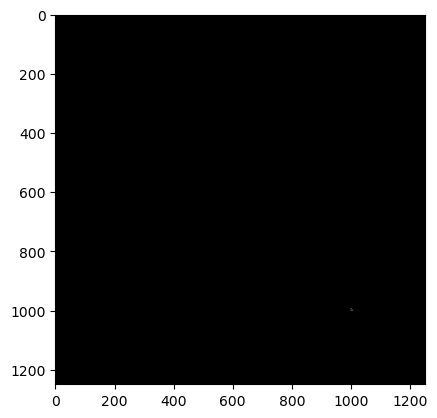

790139750472.1736


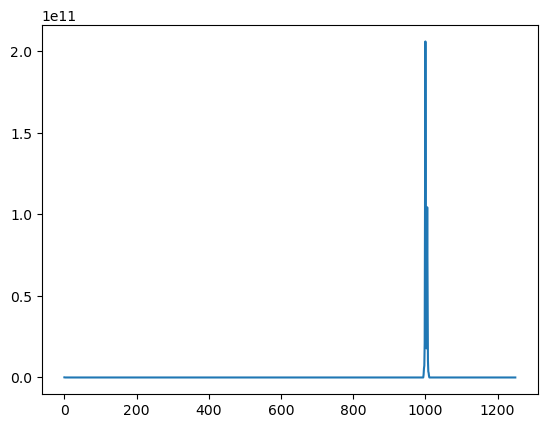

In [53]:
photon=result["pixel"].to_numpy()
clip=(photon[3][0:1250,0:1250])

import matplotlib.pyplot as plt
plt.imshow(clip, cmap='gray')
plt.show()

print(clip.sum())
# plot the photon count along the clipped region
plt.plot(clip.sum(axis=0))
plt.show()

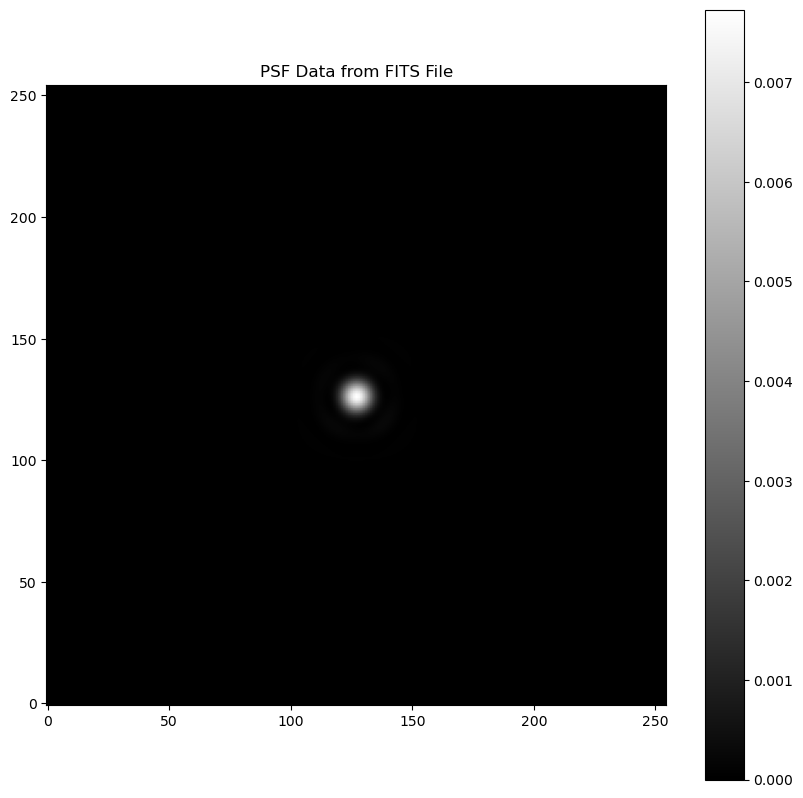

(255, 255)

In [55]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve

psf_filename = '/Users/wasi/Downloads/Gsamples_median_withJitter_X00-000d_Y00-000d_S0-001mm.fits'
hdu_list = fits.open(psf_filename)
psf_data = hdu_list[0].data
hdu_list.close()

# Display the PSF data
plt.figure(figsize=(10, 10))
plt.imshow(psf_data, cmap='gray', origin='lower')
plt.colorbar()
plt.title('PSF Data from FITS File')
plt.show()

psf_data.shape


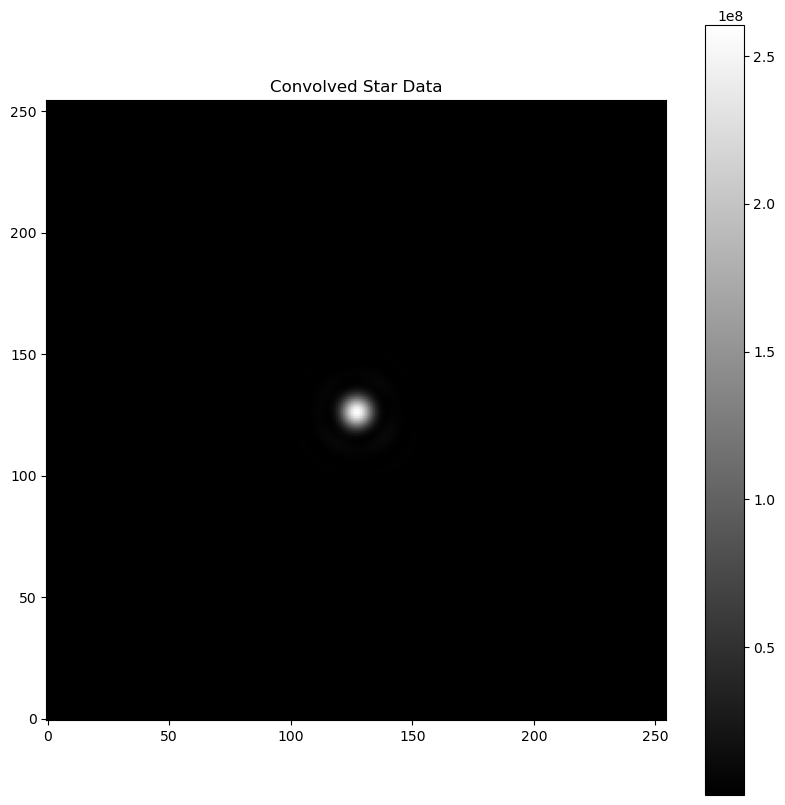

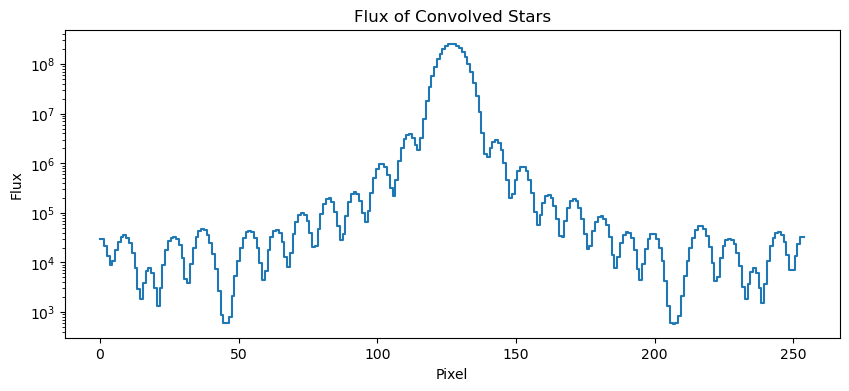

In [59]:
snaps=result["pixel"].sel(time=1000)
# psf_data is of the shape (255, 255) and snaps is of the shape (450,450) so we must resize the psf_data to the shape of snaps
# resize the snaps to the shape of psf_data
from scipy.ndimage import zoom
snaps = zoom(snaps, (psf_data.shape[0] / snaps.shape[0], psf_data.shape[1] / snaps.shape[1]), order=3)

convolved_data = fftconvolve(snaps, psf_data, mode='same')
convolved_filename = '/Users/wasi/DeSC/convolved_u.fits'
hdu = fits.PrimaryHDU(convolved_data)
hdu.writeto(convolved_filename, overwrite=True)

# Display the convolved image data
plt.figure(figsize=(10, 10))
plt.imshow(convolved_data, cmap='gray', origin='lower')
plt.colorbar()
plt.title('Convolved Star Data')
plt.show()

# Plot the flux of the stars along the central row
center = convolved_data.shape[0] // 2
plt.figure(figsize=(10, 4))
flux = convolved_data[center, :]
plt.plot(flux, drawstyle='steps-mid')
plt.yscale('log')
plt.xlabel('Pixel')
plt.ylabel('Flux')
plt.title('Flux of Convolved Stars')
plt.show()


Fitted parameters: a = 260302765.19849476, b = 50.1694028009965, c = 5.882381721938604


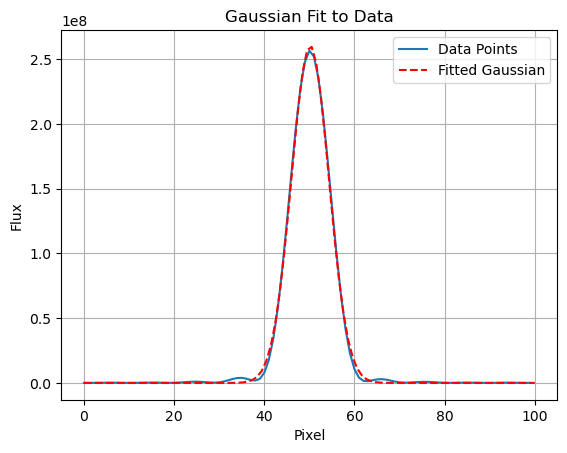

FWHM: 0.14 arcseconds


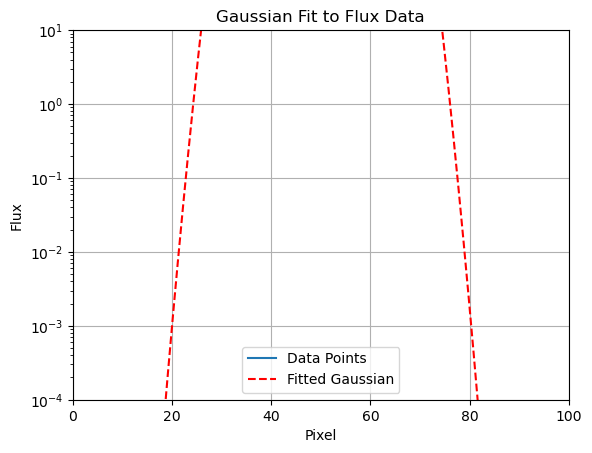

In [58]:

import numpy as np
from scipy.optimize import curve_fit

def gaussian(x, a, b, c):
    return a * np.exp(-((x - b) / c) ** 2)

# Cut the flux data to the central 100 pixels
flux_cut = flux[center - 50:center + 50]

# Fit the flux data to a Gaussian
x = np.arange(len(flux_cut))
initial_guess = [max(flux_cut), np.argmax(flux_cut), 10]
popt, pcov = curve_fit(gaussian, x, flux_cut, p0=initial_guess)
a, b, c = popt
print(f"Fitted parameters: a = {a}, b = {b}, c = {c}")

# Plot the flux data and the fitted Gaussian
x_fit = np.linspace(0, len(flux_cut), 100)
y_fit = gaussian(x_fit, *popt)
plt.plot(x, flux_cut, label='Data Points')
plt.plot(x_fit, y_fit, label='Fitted Gaussian', color='red', linestyle='--')
plt.legend()
plt.xlabel('Pixel')
plt.ylabel('Flux')
plt.grid()
plt.title('Gaussian Fit to Data')
plt.show()

# Full width at half maximum (FWHM) of the Gaussian
fwhm = (2 * np.sqrt(2 * np.log(2)) * c)*0.01 # Convert to arcseconds

print(f"FWHM: {fwhm:.2f} arcseconds")


plt.plot(x, flux_cut, label='Data Points')
plt.plot(x_fit, y_fit, label='Fitted Gaussian', color='red', linestyle='--')
plt.legend()
plt.xlabel('Pixel')
plt.ylabel('Flux')
plt.grid()
plt.yscale('log')
# set ylimits to see the data better
plt.ylim(1e-4, 10)
plt.xlim(0,100)
plt.title('Gaussian Fit to Flux Data')
plt.show()

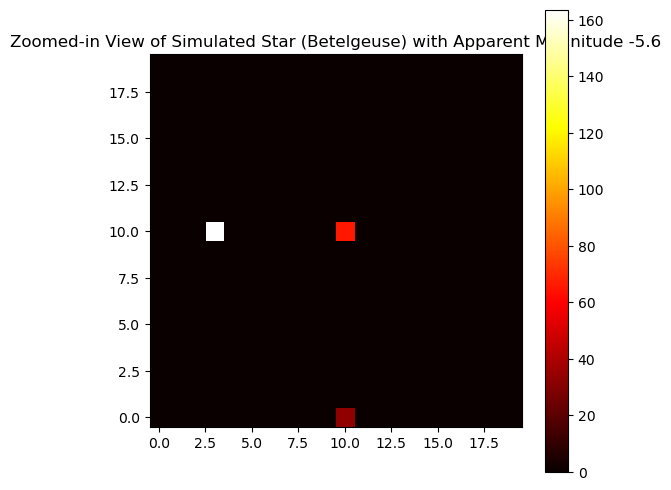

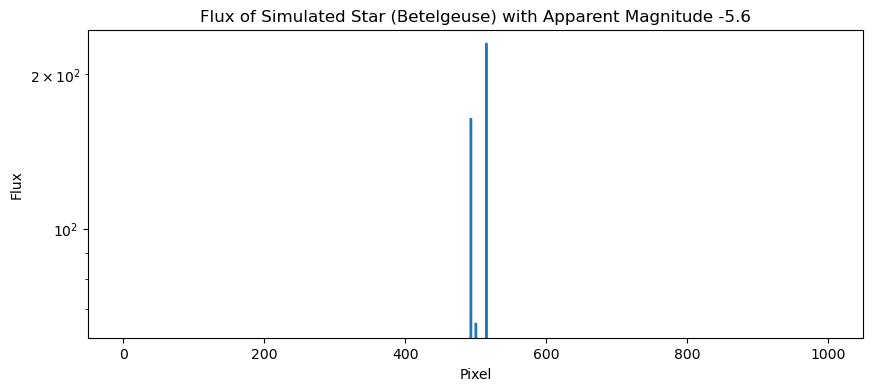

In [15]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# Function to simulate a point star in a FITS file and display a zoomed-in region
def simulate_star_fits(apparent_magnitude, absolute_magnitude, distance, zoom_size=50, filename='grid_simulation.fits'):
    # Define the size of the image
    size = 1000
    # Create an empty image array
    image_data = np.zeros((size, size))

    # Calculate the center of the image
    center = size // 2
    lower = center - 10
    upper = center + 10

    # Calculate the brightness using the distance modulus formula
    brightness = 10 ** ((apparent_magnitude - absolute_magnitude + 5) / 2.5)

    # Place the star at the center of the image
    image_data[center, center] = brightness

    image_data[lower, center] = brightness*0.5
    image_data[upper, center] = brightness*1.5
    image_data[center, lower+3] = brightness*2.5
    image_data[center, upper+5] = brightness*3.5

    # run a loop to create a grid of stars
        
    # Create a FITS PrimaryHDU object
    hdu = fits.PrimaryHDU(image_data)

    # Write the FITS file
    hdu.writeto(filename, overwrite=True)
    
    # Load the FITS file to display
    hdu_list = fits.open(filename)
    image_data = hdu_list[0].data

    # Define zoom region (around the center of the image)
    zoom_region = image_data[center - zoom_size // 2:center + zoom_size // 2, center - zoom_size // 2:center + zoom_size // 2]

    # Display the zoomed-in image data
    plt.figure(figsize=(6, 6))
    plt.imshow(zoom_region, cmap='hot', origin='lower')
    plt.colorbar()
    plt.title(f'Zoomed-in View of Simulated Star (Betelgeuse) with Apparent Magnitude {apparent_magnitude}')
    plt.show()
    
    return image_data, center

# Constants for Betelgeuse
apparent_magnitude = -5.6  # Apparent magnitude of Betelgeuse
absolute_magnitude = -5.14  # Approximate absolute magnitude of Betelgeuse
distance = 200  # Approximate distance to Betelgeuse in parsecs

# Simulate Betelgeuse and a zoom region of 20
image_data, center = simulate_star_fits(apparent_magnitude, absolute_magnitude, distance, zoom_size=20)

# Plot the flux of the star
plt.figure(figsize=(10, 4))
flux = image_data[center, :]
plt.plot(flux, drawstyle='steps-mid')
plt.yscale('log')
plt.xlabel('Pixel')
plt.ylabel('Flux')
plt.title('Flux of Simulated Star (Betelgeuse) with Apparent Magnitude -5.6')
plt.show()


In [8]:
import pyxel
config = pyxel.load("grid.yaml")

exposure = config.exposure
detector = config.detector
pipeline = config.pipeline

result = pyxel.run_mode(
    mode=exposure,
    detector=detector,
    pipeline=pipeline,
)

result

Readout time:   0%|          | 0/3 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.11/site-packages/pyxel/pipelines/model_group.py:90: UserWarning: Trying to set negative values in the Photon array! Negative values clipped to 0.
  model(detector)
/opt/anaconda3/lib/python3.11/site-packages/pyxel/pipelines/model_group.py:90: UserWarning: Trying to set negative values in the Photon array! Negative values clipped to 0.
  model(detector)


DataTree('None', parent=None)
│   Dimensions:  (time: 3, y: 450, x: 450)
│   Coordinates:
│     * time     (time) float64 24B 1.0 5.0 7.0
│     * y        (y) int64 4kB 0 1 2 3 4 5 6 7 8 ... 442 443 444 445 446 447 448 449
│     * x        (x) int64 4kB 0 1 2 3 4 5 6 7 8 ... 442 443 444 445 446 447 448 449
│   Data variables:
│       photon   (time, y, x) float64 5MB 0.002292 0.001548 ... 0.003096 0.004585
│       charge   (time, y, x) float64 5MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
│       pixel    (time, y, x) float64 5MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
│       signal   (time, y, x) float64 5MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
│       image    (time, y, x) uint16 1MB 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
│   Attributes:
│       pyxel version:  2.0
│       running mode:   Exposure
├── DataTree('scene')
└── DataTree('data')

In [9]:
pyxel.display_detector(detector)

BokehModel(combine_events=True, render_bundle={'docs_json': {'11541b2e-7d6a-4cf7-9dd5-e166a688c046': {'version…

Number of detected peaks: 25
Isolated peak 1: [4.52398462e-15 3.65470979e-15 3.88854544e-15 3.70379825e-15
 4.87498367e-15 5.77254678e-15 3.21422795e-15]
Isolated peak 2: [4.52398462e-15 3.65470979e-15 3.88854544e-15 3.70379825e-15
 4.87498367e-15 5.77254678e-15 3.21422795e-15 2.00198819e-15
 2.35199871e-15 2.37799564e-15]
Isolated peak 3: [3.21422795e-15 2.00198819e-15 2.35199871e-15 2.37799564e-15
 4.52407650e-15 5.36764239e-15 2.90545245e-15 4.40071478e-15
 1.03512579e-14 5.07433930e-15]
Isolated peak 4: [2.37799564e-15 4.52407650e-15 5.36764239e-15 2.90545245e-15
 4.40071478e-15 1.03512579e-14 5.07433930e-15 3.32085213e-15
 2.56213576e-15 4.47576880e-15]
Isolated peak 5: [4.40071478e-15 1.03512579e-14 5.07433930e-15 3.32085213e-15
 2.56213576e-15 4.47576880e-15 2.99220114e-15 5.64119727e-15
 3.64869018e-15 3.02454205e-15]
Isolated peak 6: [5.07433930e-15 3.32085213e-15 2.56213576e-15 4.47576880e-15
 2.99220114e-15 5.64119727e-15 3.64869018e-15 3.02454205e-15
 1.91502224e-15 2.87082